In [1]:
import torch
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score 
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Exploration

In [2]:
# loading the data
diabetes_data = pd.read_csv("../Deep Learning/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


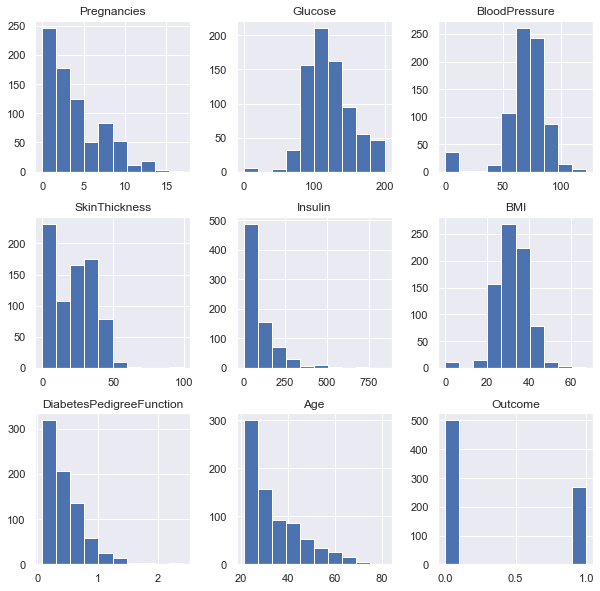

In [3]:
# ploting the histogram of variables to see if any imbalance is there or not
p = diabetes_data.hist(figsize = (10,10))

0    500
1    268
Name: Outcome, dtype: int64


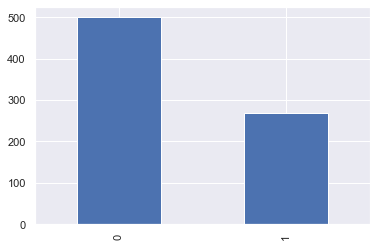

In [4]:
# checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

Because of the imbalance we will now be using the scaled data for further assignment

In [5]:
# Loading the scaled data
diabetes_features, diabetes_labels = load_svmlight_file("../Deep Learning/diabetes_scale.txt")
# converting to an array for training features
diabetes_features = diabetes_features.toarray()

In [6]:
# weight matrix
np.random.seed(10)
weight = np.random.rand(8)
print(weight)

[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071]


In [7]:
# Defining functions for getting the accuracy, predicting and updateing the weights
def accuracy(true_val, pred_value):
    return (accuracy_score(true_val, pred_value))

def predict(diabetes_features,weight):
    pred = []
    for row in diabetes_features:
        activation = 0
        for i in range (len(row)):
            activation += row[i] * weight[i]   # Xi * Wi
        pred.append(np.sign(activation)) # adding the predictiion of one row
    return (accuracy(diabetes_labels, pred))
#     return (np.sign(np.dot(diabetes_features,weight)))

def update_weight(diabetes_features,diabetes_labels, weight):
    sum_new = 0
    learning_rate = 0.0001
    for row, y in zip(diabetes_features, diabetes_labels):
        # calaculating the summation of 1*8 vector for each row
        sum_new += y * row * (1 if (y * np.dot(row, weight) < 0) else 0)
    #modifying the weights
    add = learning_rate * sum_new
    weight += add
    return weight

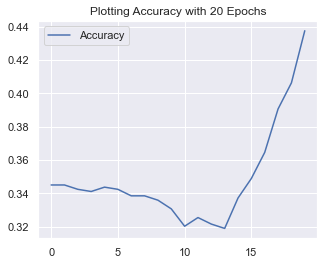

Best accuracy for updated weights: 
 0.4375
Best updated weights: 
 [ 0.21251466  0.04535546  0.66959414  0.26550589 -0.14286628  0.12047968
 -0.32792143  0.164944  ]


In [8]:
# updating weights and getting the validation accuracy on the updated weights
best_weights = 0
best_acc = 0
acc_list = []
for i in range(20):
    acc = predict(diabetes_features,weight)
    weight = update_weight(diabetes_features,diabetes_labels, weight)
    
    acc_list.append(acc)
    if acc>best_acc:
        best_acc = acc
        best_weights = weight

#Plotting Validation Curve
plt.figure(figsize=(5, 4))
plt.title("Plotting Accuracy with 20 Epochs")
plt.plot(np.arange(20), acc_list, label = "Accuracy")
plt.legend()
plt.show()

# printing best accuracy value and best weights
print("Best accuracy for updated weights: \n", best_acc)
print("Best updated weights: \n", best_weights)

As we are only getting 43% validation accuracy, we will further experiment with the model 

# Experimenting

## Train-Test-split without Bias

In [9]:
# Splitting the data with bias as 0
bigX_train, X_test, bigy_train, y_test = train_test_split(diabetes_features, diabetes_labels, random_state=42, 
                                                          test_size = 0.2,stratify =diabetes_labels)  

X_train, X_val, y_train, y_val = train_test_split(bigX_train, bigy_train, test_size =0.2, 
                                                  random_state=42, stratify = bigy_train)

In [10]:
print(f"Training label size: {X_train.shape}, Testing label size: {X_test.shape}, Validation label size: {X_val.shape}")

Training label size: (491, 8), Testing label size: (154, 8), Validation label size: (123, 8)


### Sk-learn Baseline

In [11]:
# implementing the built in perceptron algorithm to compare the results 
from sklearn.linear_model import Perceptron
percep = Perceptron(tol=1e-3, random_state=42)
percep.fit(bigX_train, bigy_train)
Perceptron()
predict = percep.predict(X_test) 
print("Testing Accuracy for Sklearn Baseline : ", percep.score(X_test, y_test)) 
print("Precision :",precision_score(y_test, predict, average = "binary")) 
print("Recall :",recall_score(y_test, predict, average = "binary")) 
print("F1 Score :",f1_score(y_test, predict, average = "binary")) 

Testing Accuracy for Sklearn Baseline :  0.7987012987012987
Precision : 0.8349514563106796
Recall : 0.86
F1 Score : 0.8472906403940887


In [12]:
# functions 
def __accuracy__(true_val, pred_val):
    return (accuracy_score(true_val, pred_val))


def __predict__(features,labels, weight): 
    pred = []
    for row in features:
        activation = 0
        for i in range (len(row)):
            activation += row[i] * weight[i]
        pred.append(np.sign(activation))
    return (__accuracy__(labels, pred))
#     return (np.sign(np.dot(diabetes_features,weight)))

def __update_weight__(features ,labels, weight, learning_rate): # train 
    sum_new = 0
    for row, y in zip(features, labels):
        sum_new += y * row * (1 if (y * np.dot(row, weight) < 0) else 0)
    add = learning_rate * sum_new
    weight += add
    return weight

def accuracy_scores(features,labels,weight):
    pred = list()
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weight[i] * row[i] # Xi*Wi
        pred.append(np.sign(activation))# Predictig for 1 row
    print("Confusion Report : ")
    print(classification_report(labels, pred))
    return 

def loss(features ,labels, weight):
    sum_loss = 0
    for row, y in zip(features, labels):
        sum_loss += (1 if (y * np.dot(row, weight) < 0) else 0)
    return (sum_loss)/len(labels)

# Hyper-Parameter tuning without bias

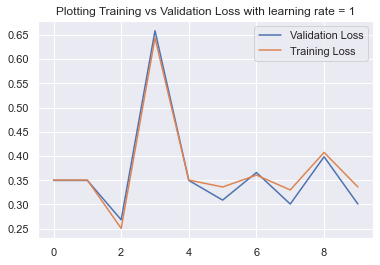

best accuracy:  0.7317073170731707
best weights:  [-135.85327868 -201.62344197   29.42202363 -105.37789829  -99.52569299
 -109.31933631 -115.17789447 -116.55311137]


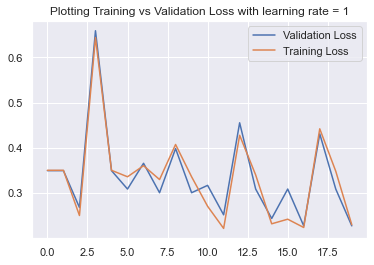

best accuracy:  0.7723577235772358
best weights:  [ -75.79445868 -240.12091472   49.91383433  -32.33751769   24.22131231
 -121.78880621  -51.57755529  -26.88644957]


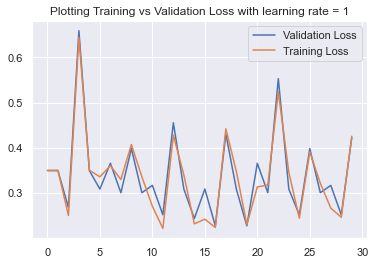

best accuracy:  0.7723577235772358
best weights:  [ -47.79446868 -286.99527187   55.37286163   -7.95370199   74.67517181
 -140.94530569  -20.15740351    1.98020663]


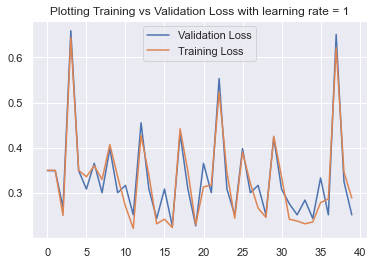

best accuracy:  0.7723577235772358
best weights:  [-135.14743768 -271.77416435   73.73353223  -85.03452169  -17.41233929
 -162.34769984 -113.59378729  -89.88647757]


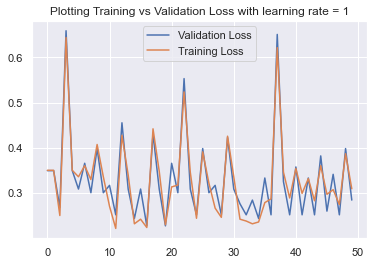

best accuracy:  0.7723577235772358
best weights:  [-147.85334568 -280.91989111   95.17616333 -112.22644279  -40.78826679
 -169.49525236 -144.52376779  -93.81982737]


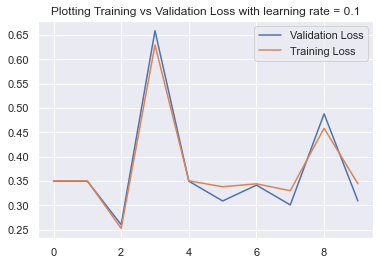

best accuracy:  0.7398373983739838
best weights:  [-15.12383853 -19.19431254   3.53350949 -12.4202567  -12.33061825
 -10.61292275 -13.96277704 -13.67308839]


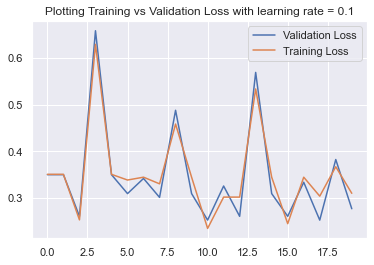

best accuracy:  0.7479674796747967
best weights:  [-13.50619263 -26.25109582   5.82859191 -10.23137094  -5.68854179
 -13.91918393 -11.74467351  -9.20308948]


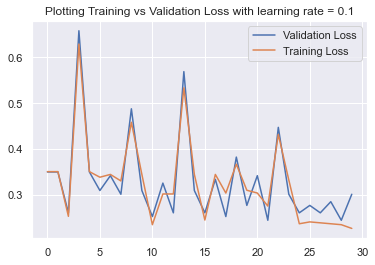

best accuracy:  0.7560975609756098
best weights:  [ -6.38266343 -22.43853291   7.38433163  -2.73743201   5.9301304
 -12.75569848  -5.24843161   0.10691006]


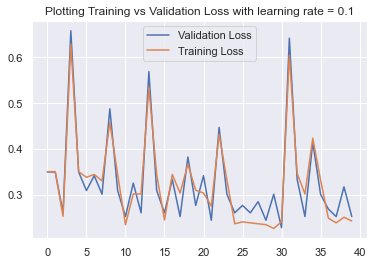

best accuracy:  0.7723577235772358
best weights:  [ -9.75325353 -24.62395933   8.06466093  -6.04551456   1.91074092
 -14.80800997  -9.11273586  -3.77642472]


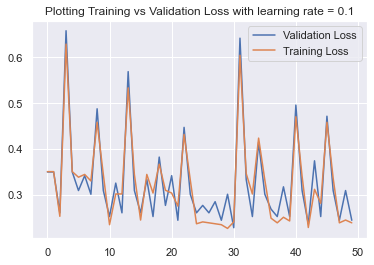

best accuracy:  0.7723577235772358
best weights:  [ -9.82972553 -26.68275212   8.43023584  -5.77783882   2.61428302
 -15.68148359  -9.13707397  -4.01642553]


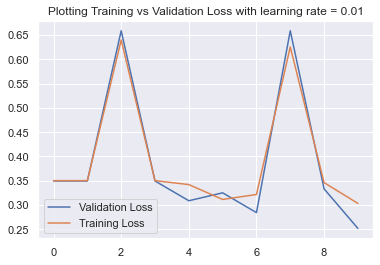

best accuracy:  0.7479674796747967
best weights:  [-1.18442364 -2.58481642  0.21121517 -0.8930792  -0.48151274 -1.30211732
 -0.87591888 -1.13641925]


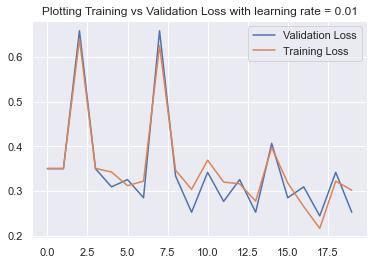

best accuracy:  0.7560975609756098
best weights:  [-1.14148269 -2.50366058  0.73433002 -0.89338227 -0.291915   -1.38135739
 -1.0912733  -0.70608603]


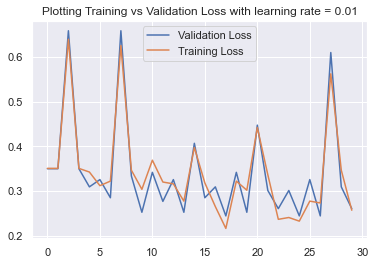

best accuracy:  0.7560975609756098
best weights:  [-1.19795342 -2.94667562  0.72449401 -0.7263118   0.06302551 -1.58928605
 -0.94568836 -0.71708615]


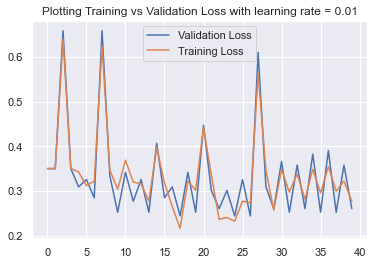

best accuracy:  0.7560975609756098
best weights:  [-1.21913013 -2.89953995  0.94433016 -0.93095826 -0.07461081 -1.65530704
 -1.20401459 -0.69408632]


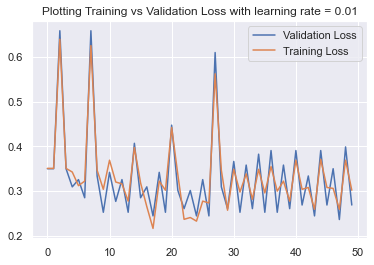

best accuracy:  0.7642276422764228
best weights:  [-1.37265978 -2.83607259  1.02974015 -1.08641281 -0.2426727  -1.69520276
 -1.42579946 -0.79641979]


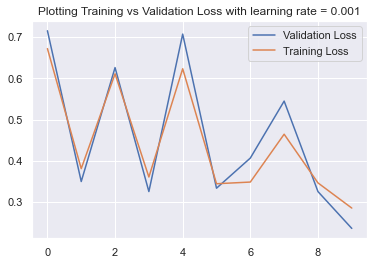

best accuracy:  0.7642276422764228
best weights:  [-0.01589397 -0.14495228  0.12800224 -0.09745213  0.1469321  -0.14318575
 -0.07250298 -0.05828566]


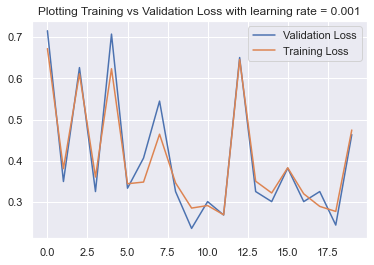

best accuracy:  0.7642276422764228
best weights:  [-0.0261881  -0.28353015  0.08495306 -0.03754305  0.1357382  -0.16591154
 -0.01808625 -0.03495234]


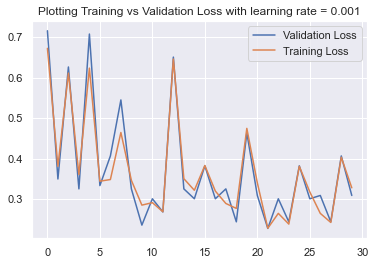

best accuracy:  0.7723577235772358
best weights:  [-0.13224696 -0.23457034  0.11824817 -0.13464405 -0.02994269 -0.16320662
 -0.14994705 -0.11285235]


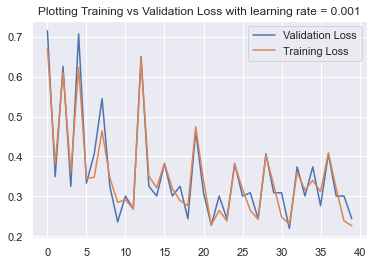

best accuracy:  0.7804878048780488
best weights:  [-0.0835999  -0.28979144  0.09454327 -0.06091679  0.05104308 -0.165226
 -0.07489581 -0.04048569]


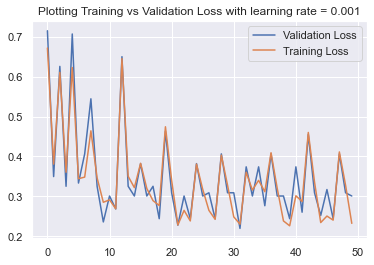

best accuracy:  0.7804878048780488
best weights:  [-0.07312932 -0.30253515  0.08572361 -0.036937    0.07398157 -0.16614404
 -0.05534074 -0.01995236]


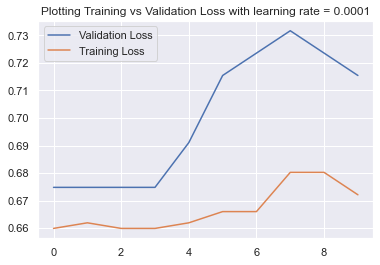

best accuracy:  0.3252032520325203
best weights:  [ 0.3068884   0.27731351  0.29284654 -0.09280455  0.30334516 -0.01760381
 -0.06102143  0.27021105]


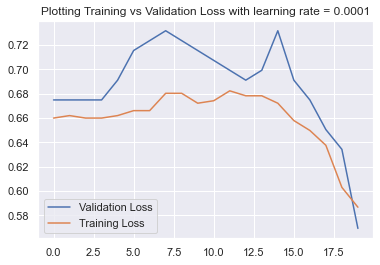

best accuracy:  0.43089430894308944
best weights:  [ 0.15402367  0.24114919  0.28783014 -0.19047022  0.15324681 -0.04757474
 -0.17389213  0.1035877 ]


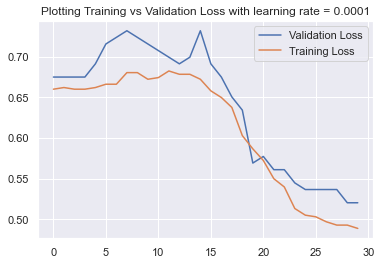

best accuracy:  0.4796747967479675
best weights:  [ 0.10666485  0.1685698   0.25059243 -0.17970357  0.14353545 -0.06986102
 -0.16016361  0.0529777 ]


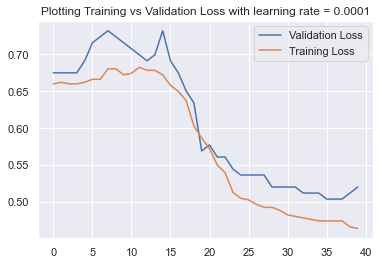

best accuracy:  0.4959349593495935
best weights:  [ 0.07712956  0.09871604  0.21146782 -0.15425409  0.15088036 -0.08628323
 -0.12968317  0.02225436]


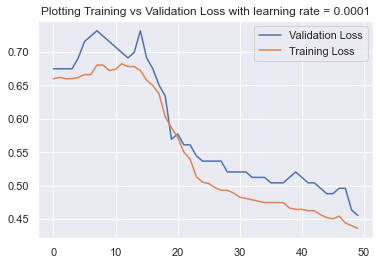

best accuracy:  0.5447154471544715
best weights:  [ 0.0477178   0.03231103  0.17560388 -0.1290945   0.15213142 -0.09797741
 -0.1016988  -0.00823232]


In [13]:
accuracy_without_bias = []
learning_rates = [1,.1,.01,.001,0.0001]
for lr in learning_rates:
    for epoch in range(10, 60, 10):
        best_weight = 0
        best_acc = 0
        loss_val_list = []
        loss_train_list = []
        acc_val_list = []
        acc_train_list = []
        np.random.seed(89)
        weight = np.random.rand(8)
        for i in range(epoch):
            weight = __update_weight__(X_train,y_train, weight, lr)   # updating the weights
            acc_train = __predict__(X_train, y_train, weight)   # getting the accuracy for training set
            acc_val = __predict__(X_val, y_val, weight)   # getting the accuracy for validation set
            acc_train_list.append(acc_train)   # appending the training accuracy in a list
            acc_val_list.append(acc_val)   # appending the validation accuracy in a list
            loss_train = loss(X_train, y_train, weight)   # getting the loss for training set
            loss_val = loss(X_val, y_val, weight)   # getting the loss for validation set
            loss_val_list.append(loss_val)   # appending the validation loss in a list
            loss_train_list.append(loss_train)   # appending the training loss in a list
            # saving the best values
            if acc_val > best_acc:    
                best_acc = acc_val
                best_weight = weight
        # Plotting the loss curve 
        plt.title("Plotting Training vs Validation Loss with learning rate = "+ str(lr))
        plt.plot(np.arange(epoch), loss_val_list, label = "Validation Loss")
        plt.plot(np.arange(epoch), loss_train_list, label = "Training Loss")
        plt.legend()
        plt.show()
        # printing the best accuracy value and best weights
        print("best accuracy: ",best_acc)
        print("best weights: " ,best_weight)
        # appending the values into a list        
        accuracy_without_bias.append((best_acc, lr, epoch, best_weight))
                

In [14]:
# saving all the values to a dataframe for easy readability 
accuracy_without_bias.sort(reverse=True)
df = pd.DataFrame(accuracy_without_bias,columns=["Validation Accuracy","Learning_rate","Epocs","Weights"])
df

,Validation Accuracy,Learning_rate,Epocs,Weights
0,0.780488,0.0010,50,"[-0.07312932303116425, -0.30253514929832953, 0..."
1,0.780488,0.0010,40,"[-0.08359990003116444, -0.28979143928832957, 0..."
2,0.772358,1.0000,50,"[-147.8533456795298, -280.9198911056883, 95.17..."
3,0.772358,1.0000,40,"[-135.1474376795299, -271.7741643456883, 73.73..."
4,0.772358,1.0000,30,"[-47.7944686795302, -286.99527186568827, 55.37..."
5,0.772358,1.0000,20,"[-75.79445867953041, -240.1209147156882, 49.91..."
6,0.772358,0.1000,50,"[-9.829725529531029, -26.68275211668831, 8.430..."
7,0.772358,0.1000,40,"[-9.753253529531044, -24.623959331688308, 8.06..."
8,0.772358,0.0010,30,"[-0.13224695603116454, -0.23457034434832963, 0..."
9,0.764228,0.0100,50,"[-1.3726597795311535, -2.8360725943883294, 1.0..."


In [15]:
# printing the validation accuracy with the best parameters obtained from the above dataframe
accuracy = df["Validation Accuracy"][0]
print("Best Validation Accuracy with Bias :",accuracy)
overall_best_weights = df['Weights'][0]
overall_best_weights
accuracy_scores(X_val,y_val,overall_best_weights)

Best Validation Accuracy with Bias : 0.7804878048780488
Confusion Report : 
              precision    recall  f1-score   support

        -1.0       0.55      0.77      0.64        43
         1.0       0.84      0.66      0.74        80

    accuracy                           0.70       123
   macro avg       0.70      0.71      0.69       123
weighted avg       0.74      0.70      0.71       123



## Train-Test-split with Bias 

In [16]:
# add one more weight
# add one column in features data for bias
np.random.seed(89)
weight = np.random.rand(9)
bias_col = np.ones(len(diabetes_features)).reshape(-1,1)
features = np.concatenate([diabetes_features, bias_col], axis =1)
bigX_train, X_test_bias, bigy_train, y_test_bias = train_test_split(features, diabetes_labels, random_state=42, 
                                                          test_size = 0.2,stratify = diabetes_labels) 
X_train_bias , X_val_bias, y_train_bias, y_val_bias = train_test_split(bigX_train, bigy_train, test_size =0.2, 
                                                  random_state=42, stratify = bigy_train)
print(f"Training label size: {X_train_bias.shape}, Testing label size: {X_test_bias.shape}, Validation label size: {X_val_bias.shape}")

Training label size: (491, 9), Testing label size: (154, 9), Validation label size: (123, 9)


# Hyper-Parameter tuning with bias

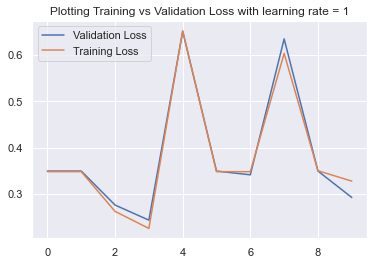

best accuracy:  0.7560975609756098
best weights:  [-140.67680518 -259.66363439    0.99579383  -87.03447589  -92.95358699
 -124.57716338  -96.26415047 -133.48644587   32.09987276]


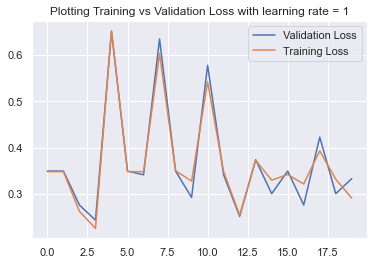

best accuracy:  0.7560975609756098
best weights:  [-106.44152018 -417.22140978   30.12693163  -40.95372059   18.35842861
 -182.31786735  -48.19241877  -58.68645707  -97.90012724]


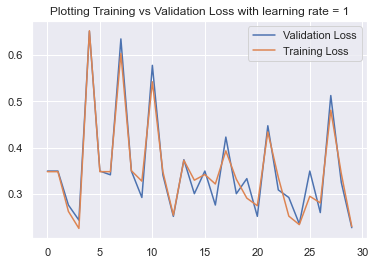

best accuracy:  0.7723577235772358
best weights:  [-128.73565968 -426.09075332   75.29087763  -64.55979129   10.57588431
 -199.21653303  -91.63478595  -58.75313807  -38.90012724]


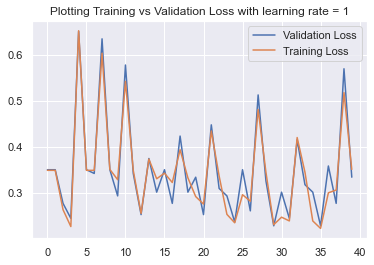

best accuracy:  0.7723577235772358
best weights:  [-215.26510518 -352.51788865  124.09418223 -165.68099739 -107.50452829
 -206.38345274 -214.53658739 -145.91981667  160.09987276]


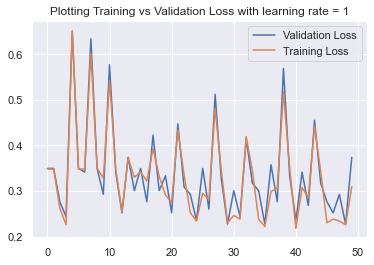

best accuracy:  0.7723577235772358
best weights:  [ -95.79450918 -384.49274933  114.27451983  -31.73152479   85.28975911
 -200.83504045  -73.63650917   -6.21981517  -42.90012724]


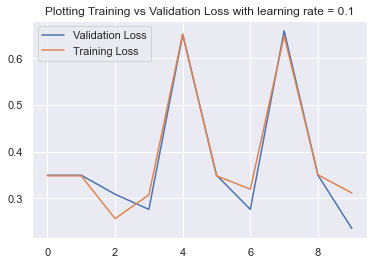

best accuracy:  0.7642276422764228
best weights:  [-13.81207308 -28.5777285   -0.64681919  -8.01116835  -7.59019274
 -13.9787949   -7.9269103  -13.30975536   1.59987276]


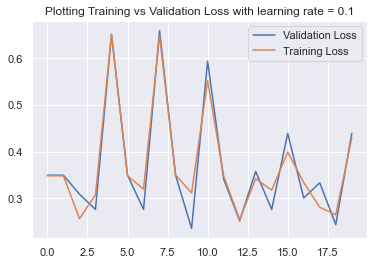

best accuracy:  0.7642276422764228
best weights:  [ -8.25913243 -40.71943576   2.90891844  -2.57480889   3.78379867
 -18.38744089  -2.46012988  -4.12642331 -10.40012724]


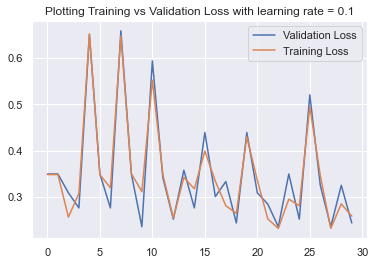

best accuracy:  0.7642276422764228
best weights:  [-13.80031193 -37.70235011   9.21711696  -8.90208166  -2.28476305
 -19.28997526 -12.02247117  -7.30309131   2.59987276]


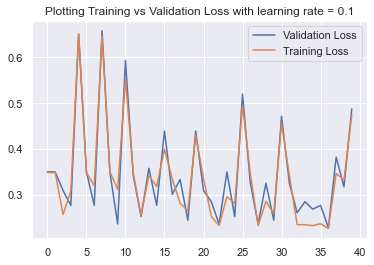

best accuracy:  0.7723577235772358
best weights:  [ -7.65325333 -36.63451031   9.25810215  -1.48491092   8.93509144
 -18.92052805  -5.36628045   0.4502416   -6.30012724]


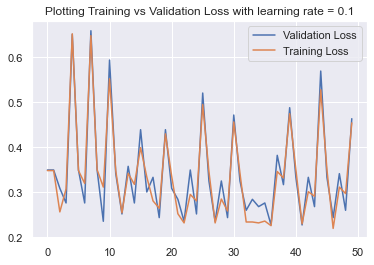

best accuracy:  0.7723577235772358
best weights:  [ -9.23560798 -43.61591595   9.24662723  -2.44552026   9.93437799
 -21.92246664  -5.04177172  -1.13309299  -7.80012724]


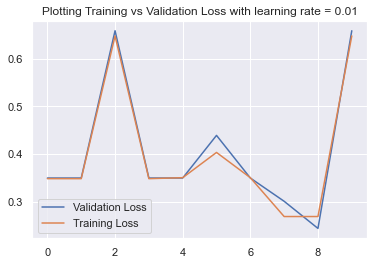

best accuracy:  0.7560975609756098
best weights:  [-0.08089404 -2.45376106  0.13072338  0.1329815   0.74900734 -1.04035873
  0.1906396   0.07891418 -0.95012724]


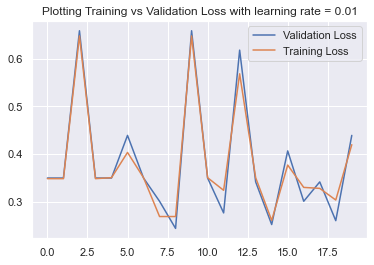

best accuracy:  0.7560975609756098
best weights:  [-0.81912958 -4.21270563  0.29564136 -0.30328174  0.53695017 -1.90368226
 -0.22719135 -0.47541938 -0.94012724]


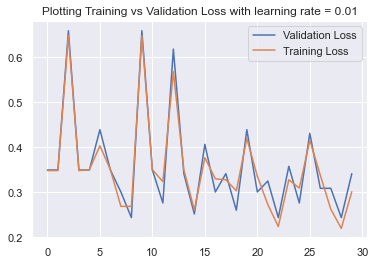

best accuracy:  0.7560975609756098
best weights:  [-0.96324745 -4.1478312   0.81564149 -0.40156462  0.58702072 -1.98900277
 -0.55598732 -0.25708614 -0.55012724]


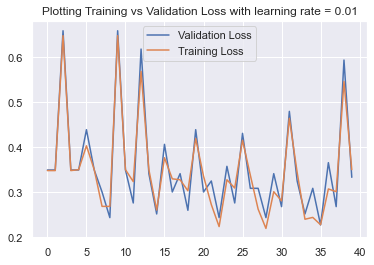

best accuracy:  0.7723577235772358
best weights:  [-2.23383613 -3.58119806  1.28777284 -1.7375242  -1.05782599 -2.14745289
 -2.16596177 -1.5370863   1.84987276]


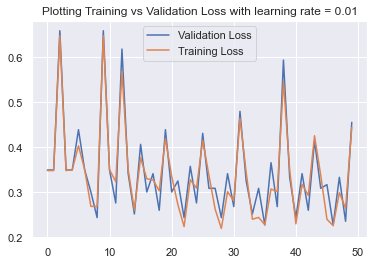

best accuracy:  0.7723577235772358
best weights:  [-0.89383603 -4.35989137  1.05351056 -0.24701942  1.09905301 -2.16697617
 -0.51170902 -0.03708633 -0.61012724]


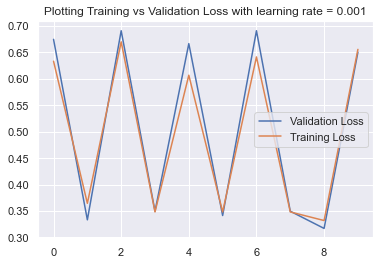

best accuracy:  0.6829268292682927
best weights:  [ 0.08345899 -0.24239447  0.11618255 -0.02693703  0.33452312 -0.17772675
  0.03176518  0.04604768  0.12987276]


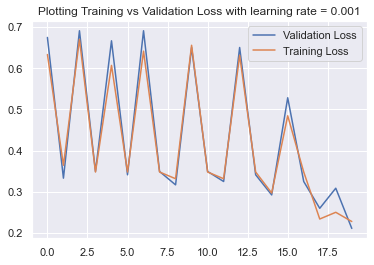

best accuracy:  0.7886178861788617
best weights:  [-0.05665869 -0.44713816  0.11006779 -0.104028    0.19735522 -0.26404569
 -0.05798205 -0.07308568  0.16187276]


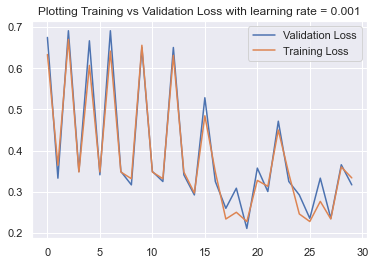

best accuracy:  0.7886178861788617
best weights:  [-0.12395284 -0.40174116  0.13675634 -0.13962396  0.09465069 -0.25090709
 -0.120918   -0.09405235  0.23187276]


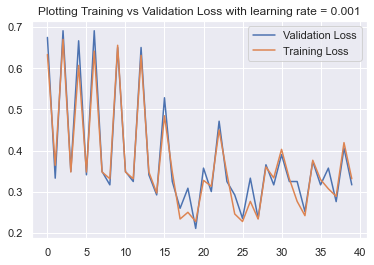

best accuracy:  0.7886178861788617
best weights:  [-0.16795286 -0.44962054  0.13972356 -0.15647245  0.05417783 -0.26069249
 -0.14843722 -0.12068569  0.23587276]


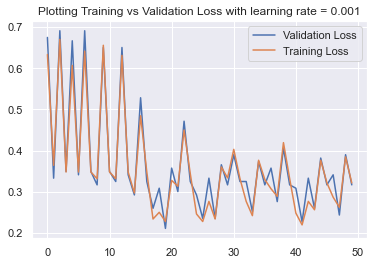

best accuracy:  0.7886178861788617
best weights:  [-0.16436464 -0.44578637  0.14013341 -0.14118963  0.05522506 -0.25596373
 -0.1379086  -0.10318569  0.21087276]


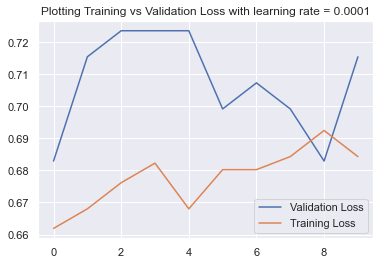

best accuracy:  0.3170731707317073
best weights:  [ 0.31196487  0.25844065  0.28029571 -0.06898536  0.33449315 -0.01772914
 -0.03330861  0.27734105  0.35707276]


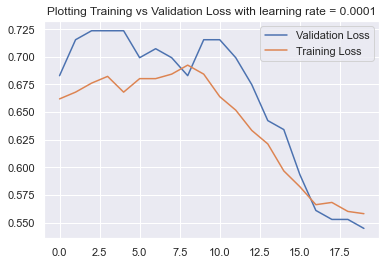

best accuracy:  0.45528455284552843
best weights:  [ 0.22019428  0.19189945  0.25187931 -0.10457428  0.27201253 -0.04794508
 -0.06989879  0.17783437  0.39977276]


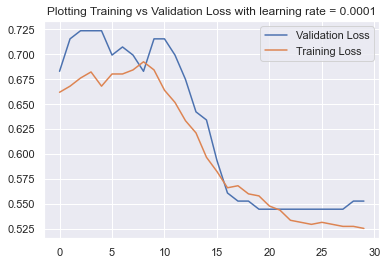

best accuracy:  0.45528455284552843
best weights:  [ 0.18174722  0.1155276   0.21312849 -0.09477632  0.2712319  -0.07264732
 -0.05426463  0.1365577   0.36777276]


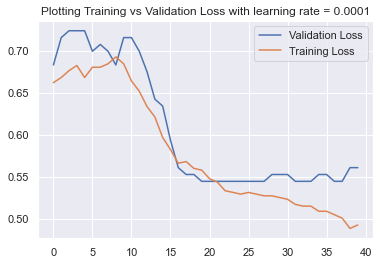

best accuracy:  0.45528455284552843
best weights:  [ 0.1456237   0.04395926  0.17365143 -0.0831026   0.271817   -0.0931345
 -0.03730802  0.09876769  0.33287276]


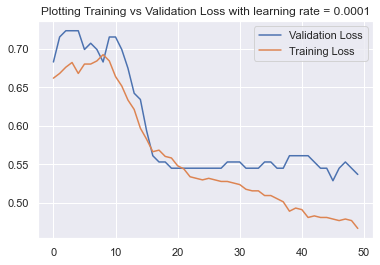

best accuracy:  0.4715447154471545
best weights:  [ 0.11155312 -0.02212615  0.13482683 -0.07222787  0.2710099  -0.10811959
 -0.02057633  0.06400435  0.29747276]


In [17]:
accuracy_with_bias = []
learning_rates = [1,.1,.01,.001,0.0001]
for lr in learning_rates:
    for epoch in range(10, 60, 10):
        best_weight = 0
        best_acc = 0
        loss_val_list = []
        loss_train_list = []
        acc_val_list = []
        acc_train_list = []
        np.random.seed(89)
        weight = np.random.rand(9)
        for i in range(epoch):
            weight = __update_weight__(X_train_bias,y_train_bias, weight, lr)
            
            acc_train = __predict__(X_train_bias, y_train_bias, weight)
            acc_val = __predict__(X_val_bias, y_val_bias, weight)
            
            acc_train_list.append(acc_train)
            acc_val_list.append(acc_val)
            
            loss_train = loss(X_train_bias, y_train_bias, weight)
            loss_val = loss(X_val_bias, y_val_bias, weight)
            
            loss_val_list.append(loss_val)
            loss_train_list.append(loss_train)
            
            if acc_val > best_acc:
                best_acc = acc_val
                best_weight = weight

                
        plt.title("Plotting Training vs Validation Loss with learning rate = "+ str(lr))
        plt.plot(np.arange(epoch), loss_val_list, label = "Validation Loss")
        plt.plot(np.arange(epoch), loss_train_list, label = "Training Loss")
        plt.legend()
        plt.show()
        print("best accuracy: ",best_acc)
        print("best weights: " ,best_weight)
                
        accuracy_with_bias.append((best_acc, lr, epoch, best_weight))
                

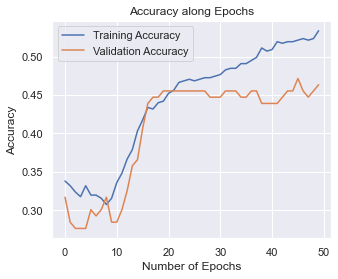

In [18]:
#Plotting Validation Curve
plt.figure(figsize=(5, 4))
plt.title("Accuracy along Epochs")
plt.plot(np.arange(50), acc_train_list, label = "Training Accuracy")
plt.plot(np.arange(50), acc_val_list, label = "Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
# saving all the values to a dataframe for easy readability 
accuracy_with_bias.sort(reverse=True)
df_bias = pd.DataFrame(accuracy_with_bias,columns=["Validation Accuracy","Learning_rate","Epocs","Weights"])
df_bias

,Validation Accuracy,Learning_rate,Epocs,Weights
0,0.788618,0.0010,50,"[-0.16436464153116373, -0.4457863652883294, 0...."
1,0.788618,0.0010,40,"[-0.16795285853116382, -0.4496205439483294, 0...."
2,0.788618,0.0010,30,"[-0.12395283553116401, -0.40174116130832954, 0..."
3,0.788618,0.0010,20,"[-0.05665868603116414, -0.44713815835832954, 0..."
4,0.772358,1.0000,50,"[-95.7945091795294, -384.4927493256879, 114.27..."
5,0.772358,1.0000,40,"[-215.26510517952954, -352.517888645688, 124.0..."
6,0.772358,1.0000,30,"[-128.73565967952982, -426.090753315688, 75.29..."
7,0.772358,0.1000,50,"[-9.235607979530997, -43.61591594768832, 9.246..."
8,0.772358,0.1000,40,"[-7.653253329531025, -36.63451030568831, 9.258..."
9,0.772358,0.0100,50,"[-0.8938360345311473, -4.359891371588326, 1.05..."


In [20]:
# printing the validation accuracy with the best parametersobtained from the above dataframe
accuracy_bias = df_bias["Validation Accuracy"][0]
print("Best Validation Accuracy with Bias :",accuracy_bias) 
overall_best_weights = df_bias['Weights'][0]
accuracy_scores(X_val_bias,y_val_bias,overall_best_weights)

Best Validation Accuracy with Bias : 0.7886178861788617
Confusion Report : 
              precision    recall  f1-score   support

        -1.0       1.00      0.09      0.17        43
         1.0       0.67      1.00      0.80        80

    accuracy                           0.68       123
   macro avg       0.84      0.55      0.49       123
weighted avg       0.79      0.68      0.58       123



After comparing we got the best validation accuracy for with bias as 78.8%, thus we will now test the model on test dataset. 

In [21]:
# Predicting on the test data with the optimized parameters
acc_test = __predict__(X_test_bias, y_test_bias, overall_best_weights)
print("Testing accuracy with bias:", acc_test)
accuracy_scores(X_test_bias,y_test_bias,overall_best_weights)

Testing accuracy with bias: 0.6623376623376623
Confusion Report : 
              precision    recall  f1-score   support

        -1.0       1.00      0.04      0.07        54
         1.0       0.66      1.00      0.79       100

    accuracy                           0.66       154
   macro avg       0.83      0.52      0.43       154
weighted avg       0.78      0.66      0.54       154

